<h2> Importing the required Libraries </h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree,svm
from sklearn.metrics import accuracy_score

<h2> Reading the Training Data using Pandas </h2>

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print('The shape of our training set: %s passengers and %s features'%(train_data.shape[0],train_data.shape[1]))

The shape of our training set: 891 passengers and 12 features


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h2> Checking for Null values </h2>

In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h4> So, there are 177 null values in 'Age' Column, 687 null values in 'Cabin' Column and 2 null values in 'Embarked' Column </h4>

<h2>  Plotting a heat map to see the correlation between the parameters and the target variable (Survived) </h2>

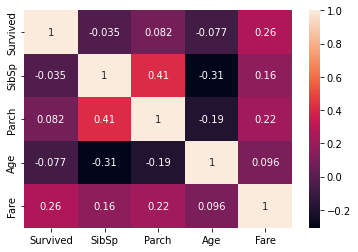

In [6]:
sns.heatmap(train_data[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot = True)
sns.set(rc={'figure.figsize':(12,10)})

<h4> From the heatmap we can say that those who have paid higher fares have a better chance of Survival </h4>

<h2> Plotting Bar Graph to visualize the Surviving Probability w.r.t SibSp (Siblings/Spouses)</h2>

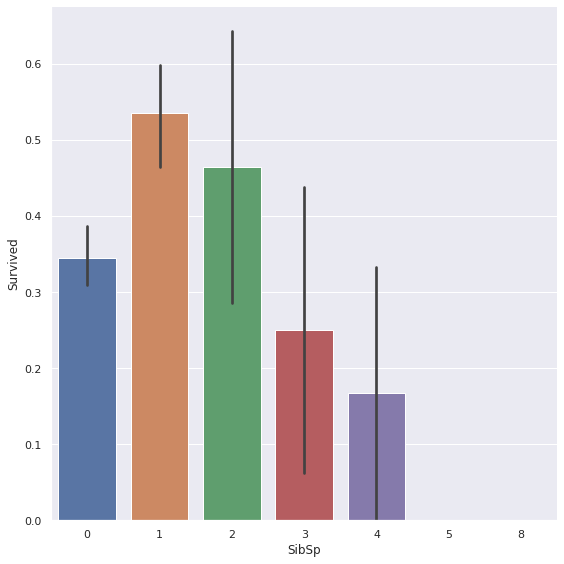

In [7]:
train_data['SibSp'].unique()
sns.catplot(x = "SibSp", y = "Survived", data = train_data, kind="bar", height = 8)

<h4> From the Bar Graph we can say that Passengers with 1 or 2 siblings have a better chance of survival than those have more than 2 siblings</h4>

<h2> Plotting a graph so as to see the distribution of age w.r.t Target Variable(Survival) </h2>

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


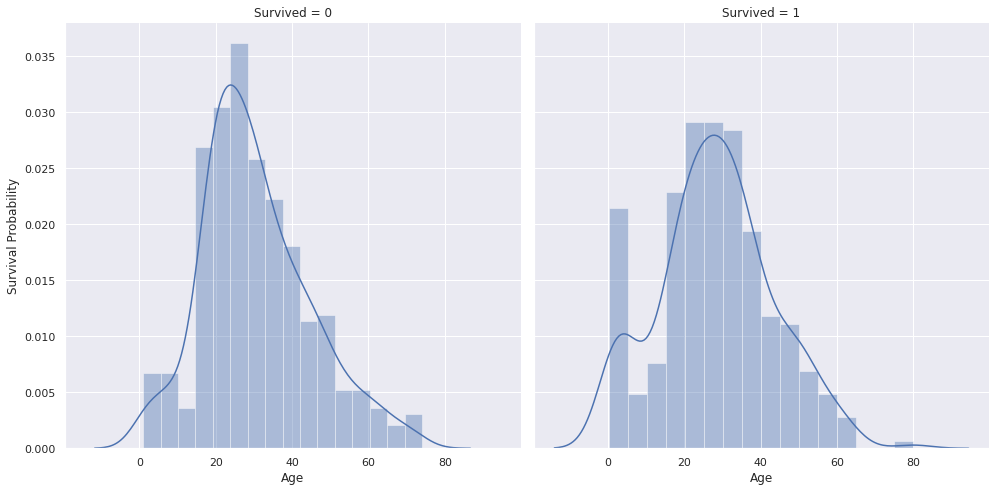

In [8]:
sns.FacetGrid(train_data, col="Survived", height = 7).map(sns.distplot, "Age").set_ylabels("Survival Probability")

<h4> From the distribution plot we can say that people with more age have a lesser chance of survival than people with less age </h4>

<h2> Using Barplot to visulalize the survival rate w.r.t gender of survivor </h2>

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

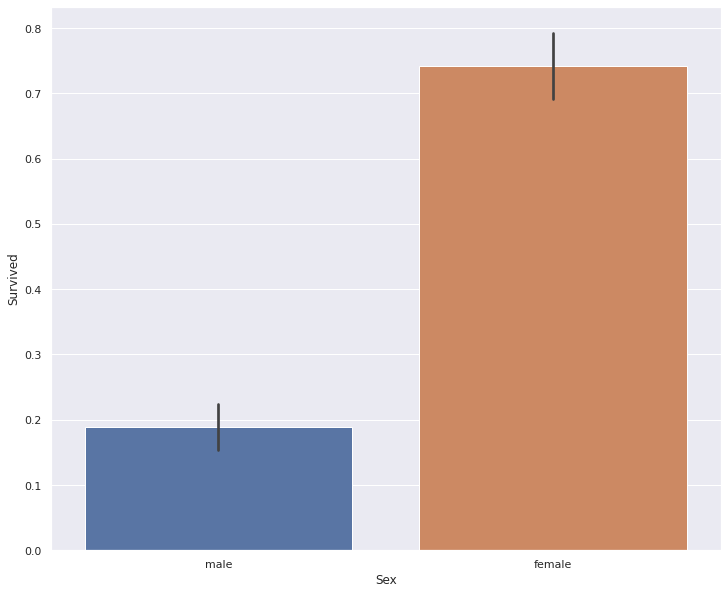

In [9]:
sns.barplot(x="Sex", y="Survived", data=train_data)

<h4> From above it is crystal clear that "There were more Female survivors than compared to Male survivors </h4>

<h2> Analyzing the Pclass column to get the survival chance analysis using bar plot </h2>

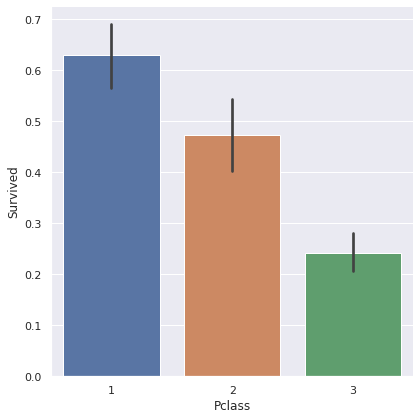

In [10]:
sns.catplot(x = "Pclass", y="Survived", data = train_data, kind="bar", height = 6)

<h3>Chances of survival :-</h3>
<h3>1st Class > 2nd Class > 3rd Class</h3>

<h2> Embarked column analysis and correction of null values </h2>

In [11]:
train_data['Embarked'].value_counts(), train_data['Embarked'].isnull().sum()

(S    644
 C    168
 Q     77
 Name: Embarked, dtype: int64,
 2)

<h3> So we have 2 null values in 'Embarked' Column of the data set </h3>

<h4> Replacing the null values with the most frequent value 'S' </h4>

In [12]:
train_data["Embarked"] = train_data["Embarked"].fillna('S')
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

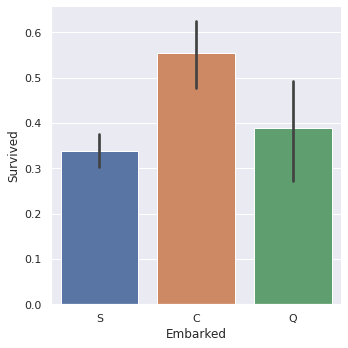

In [13]:
sns.catplot(x="Embarked", y="Survived", data=train_data, height = 5, kind="bar")

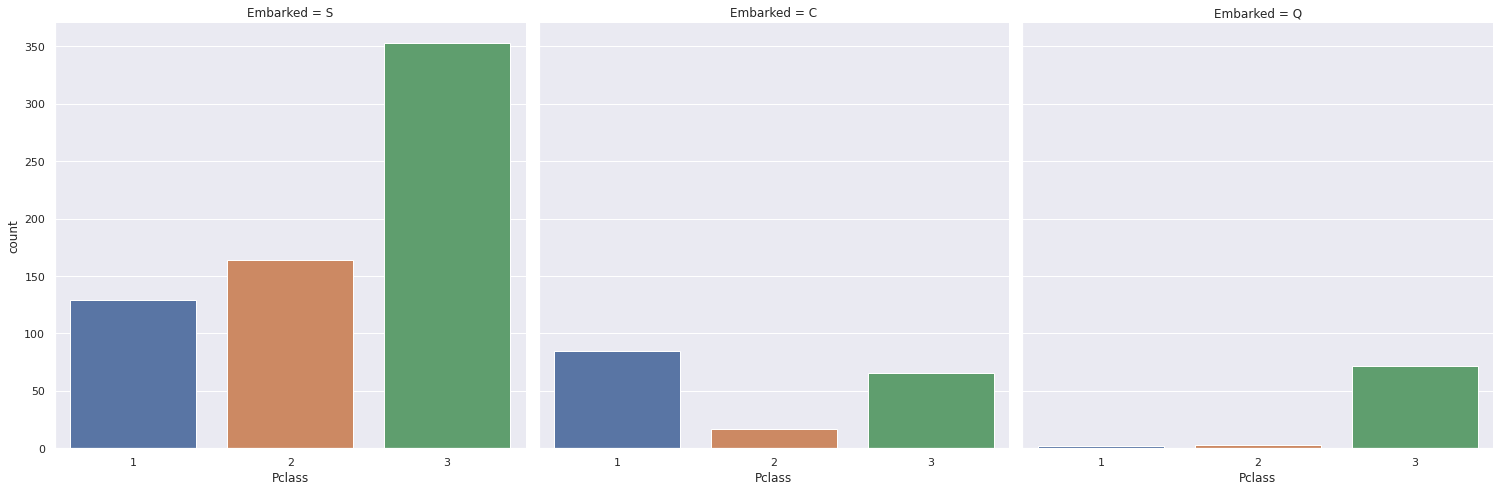

In [14]:
sns.catplot(x="Pclass", col="Embarked", data = train_data, kind="count", height=7)

<h2> Passengers embarked from C station had the most of the 1st Class booking and so the Survival chances of Passengers embarked from C Station is High </h2>

<h2> Handling missing values / null values from the 'Age' Column and replacing them with random values within the range of the Average Age - Standard Age and Average Age + Standard Age </h2>

In [15]:
mean_age = train_data["Age"].mean()
std_age = train_data["Age"].std()
mean_age, std_age

(29.69911764705882, 14.526497332334044)

In [16]:
random_age = np.random.randint(mean_age-std_age, mean_age+std_age, size = 177)
age_slice = train_data["Age"].copy()
age_slice[np.isnan(age_slice)] = random_age
train_data["Age"] = age_slice

In [17]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<h2> Dropping Un-necessary Columns from the Dataset </h2>

In [18]:
list_column_to_drop = ["PassengerId", "Ticket", "Cabin", "Name"]
train_data.drop(list_column_to_drop, axis=1, inplace=True)
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,22.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


<h2> Converting Categorical Variables (Sex, Embarked) to Numeric </h2>

In [19]:
genders = {"male":0, "female":1}
train_data["Sex"] = train_data["Sex"].map(genders)

ports = {"S":0, "C":1, "Q":2}
train_data["Embarked"] = train_data["Embarked"].map(ports)

In [20]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


<h1> Building Machine Learning Model </h1>

In [21]:
df_train_x = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df_train_y = train_data[['Survived']] #Target Variable 

<h2> Train, Test and Splitting </h2>

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=18)

<h2> Fitting the machine learning model on 4 different classification algorithms namely Random Forest Classifier, K-Neighbor Classifier, Decision Tree Classifier, Support Vector Machine and Logistic Regression and comparing them </h2>

<h3> 1. Random Forest Classifier </h3>

In [23]:
# Creating alias for Classifier
clf1 = RandomForestClassifier()

# Fitting the model using training data
clf1.fit(x_train, y_train)

# Predicting on test data
rfc_y_pred = clf1.predict(x_test)

# Calculating Accuracy to compare all models
rfc_accuracy = accuracy_score(y_test,rfc_y_pred) * 100
print("accuracy=",rfc_accuracy)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


accuracy= 86.59217877094973


<h3>2. K-Neighbor classifier </h3>

In [24]:
clf2 = KNeighborsClassifier(5)
clf2.fit(x_train, y_train)
knc_y_pred = clf2.predict(x_test)
knc_accuracy = accuracy_score(y_test,knc_y_pred)*100

print("accuracy=",knc_accuracy)

accuracy= 67.0391061452514


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


<h3>3. Decision Tree Classifier </h3>

In [25]:
clf3 = tree.DecisionTreeClassifier()
clf3 = clf3.fit(x_train, y_train)
dtc_y_pred = clf3.predict(x_test)
dtc_accuracy = accuracy_score(y_test,dtc_y_pred)*100

print("accuracy=",dtc_accuracy)

accuracy= 78.2122905027933


<h3>4. Support Vector Machine </h3>

In [26]:
clf4 = svm.SVC()
clf4.fit(x_train, y_train)
svm_y_pred = clf4.predict(x_test)
svm_accuracy = accuracy_score(y_test,svm_y_pred)*100
print("accuracy=",svm_accuracy)

accuracy= 72.06703910614524


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<h3>5. Logistic Regression </h3>

In [27]:
clf5 = LogisticRegression(solver='liblinear')
clf5.fit(x_train, y_train)
lr_y_pred = clf5.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_y_pred)*100

print("accuracy=",lr_accuracy)

accuracy= 83.79888268156425


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<h3> Accuracies of all Classifiers </h3>

In [28]:
print("Accuracy of Random Forest Classifier =",rfc_accuracy)
print("Accuracy of Logistic Regressor =",lr_accuracy)
print("Accuracy of K-Neighbor Classifier =",knc_accuracy)
print("Accuracy of Decision Tree Classifier = ",dtc_accuracy)
print("Accuracy of Support Vector Machine Classifier = ",svm_accuracy)

Accuracy of Random Forest Classifier = 86.59217877094973
Accuracy of Logistic Regressor = 83.79888268156425
Accuracy of K-Neighbor Classifier = 67.0391061452514
Accuracy of Decision Tree Classifier =  78.2122905027933
Accuracy of Support Vector Machine Classifier =  72.06703910614524


<h3>Since maximum accuracy score is with Random Forest Classifier so we choose it for making predictions on test.csv.</h3>

<h1> Final Prediction with Machine Learning Model </h1>

In [29]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [31]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<h2> Handling missing values / null values from the 'Age' Column and replacing them with random values within the range of the Average Age - Standard Age and Average Age + Standard Age </h2>

In [32]:
mean_age = test_data["Age"].mean()
std_age = test_data["Age"].std()
random_age = np.random.randint(mean_age-std_age, mean_age+std_age, size = 86)
age_slice = test_data["Age"].copy()
age_slice[np.isnan(age_slice)] = random_age
test_data["Age"] = age_slice

<h2> Replacing missing values/null values from the 'Fare' Column with Average Fare </h2>

In [33]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

<h2> Dropping Un-necessary Columns from the Dataset </h2>

In [34]:
list_column_to_drop = ["PassengerId", "Ticket", "Cabin", "Name"]
test_data.drop(list_column_to_drop, axis=1, inplace=True)
test_data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


<h2> Converting Categorical Variables (Sex, Embarked) to Numeric </h2>

In [35]:
genders = {"male":0, "female":1}
test_data["Sex"] = test_data["Sex"].map(genders)

ports = {"S":0, "C":1, "Q":2}
test_data["Embarked"] = test_data["Embarked"].map(ports)

test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [36]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<h1> Final Notebook Submission </h1>

In [37]:
x_test = test_data
y_pred = clf1.predict(x_test)
originaltest_data = pd.read_csv('/kaggle/input/titanic/test.csv')
submission = pd.DataFrame({
        "PassengerId": originaltest_data["PassengerId"],
        "Survived": y_pred
    })
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [38]:
submission.to_csv('submission.csv',index=False)

In [39]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
